In [0]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from random import shuffle

def game():
  deck = deck_numerical()
  shuffled_deck = shuffled(deck)
  z = []

  while len(shuffled_deck) > 20:
    
    player_card1 = card(shuffled_deck)
    bank_card1 = card(shuffled_deck)
    player_card2 = card(shuffled_deck)
    bank_card2 = card(shuffled_deck)
    
    player_two_cards = two_cards(player_card1, player_card2)
    bank_two_cards = two_cards(bank_card1, bank_card2)

    x = tableau(player_two_cards, bank_two_cards, shuffled_deck)
    
    z.append(x)
      
  return z

  


In [0]:
def deck_numerical():
    
    deck = []
    
    
    for i in range(1,10):
        deck.append(i)
        deck.append(i)
        deck.append(i)
        deck.append(i)
    
    x = 10
    for i in range(16):
        deck.append(x)
    
    return deck
  

In [0]:

def shuffled(d):

    eight_decks = []

    eight_decks = d*8

    random.shuffle(eight_decks)

    return eight_decks


In [0]:
def card(shuffled_deck):

  card = shuffled_deck.pop()
  if card == 10:
    card = 0

  return card


In [0]:
def two_cards(card1, card2):
    
    total = card1 + card2
    if total >= 10:
      total = total - 10
    
    return total


In [0]:
def cards_result(p, b):
  
  if p >= 10:
    p = p - 10
  if b >= 10:
    b = b - 10

  if p > b:
    result = 1
  if p < b:
    result = -1
  elif p == b:
    result = 0
  
  
  return result

In [0]:
def tableau(p, b, s):
    
    #Natural
     # Natural
    if p in (8, 9) or b in(8, 9):
     
      return cards_result(p, b)
      

    # Player Six - Seven
    elif p in (7, 6) and b in (7,6):
      return cards_result(p, b)
    elif p in (7, 6) and b in (5,4,3,2,1,0):
      bank_3_cards = b + card(s)
      if bank_3_cards >= 10:
        bank_3_cards = bank_3_cards - 10
        return cards_result(p, bank_3_cards)
      else :
        return cards_result(p, bank_3_cards)
      
    # Player 0 - 5
    elif p <= 5:
      player_3_cards = p + card(s)
       
      if b == 7:
        
        return cards_result(player_3_cards, b)
      
      elif b in (0,1,2):
        bank_3_cards = b + card(s)
        
        return cards_result(player_3_cards, bank_3_cards)
      
      elif b == 3:
        if player_3_cards != 8:
          bank_3_cards = b + card(s)
          
          return cards_result(player_3_cards, bank_3_cards)
        else :
          
          return cards_result(player_3_cards, b)
      
      elif b == 4:
        if player_3_cards in (2,3,4,5,6,7):
          bank_3_cards = b + card(s)
          
          return cards_result(player_3_cards, bank_3_cards)
        else :
          
          return cards_result(player_3_cards, b)
     
      elif b == 5:
        if player_3_cards in (4,5,6,7):
          bank_3_cards = b + card(s)
          
          return cards_result(player_3_cards, bank_3_cards)
        else :
          
          return cards_result(player_3_cards, b)
     
      elif b == 6:
        if player_3_cards in (6,7):
          bank_3_cards = b + card(s)
          
          return cards_result(player_3_cards, bank_3_cards)
        else :
          
          return cards_result(player_3_cards, b)

      
          

    

In [0]:
def sampling(n):
  
  total_player = []
  total_banker = []
  total_tie = []
  player_win = 0
  bank_win = 0
  tie_shoe = 0
  
  for i in range(n):
    
    # one game = one shoe
    y = game()
    p = y.count(1)
    b = y.count(-1)
    t = y.count(0)
    
    total_player.append(p)
    total_banker.append(b)
    total_tie.append(t)

    if p > b : 
      player_win += 1
    elif b > p :
      bank_win += 1
    else :
      tie_shoe += 1

  


  return (total_player, total_banker, total_tie, player_win, bank_win, tie_shoe)

In [0]:
n = 50000
a = sampling(50000)



([array([9.0000e+00, 1.8400e+02, 1.8430e+03, 7.8050e+03, 1.5979e+04,
         1.5176e+04, 7.2040e+03, 1.5980e+03, 1.9400e+02, 8.0000e+00]),
  array([2.0000e+00, 1.2100e+02, 1.2520e+03, 6.2690e+03, 1.4574e+04,
         1.6128e+04, 8.9630e+03, 2.3490e+03, 3.2300e+02, 1.9000e+01])],
 array([16. , 20.1, 24.2, 28.3, 32.4, 36.5, 40.6, 44.7, 48.8, 52.9, 57. ]),
 <a list of 2 Lists of Patches objects>)

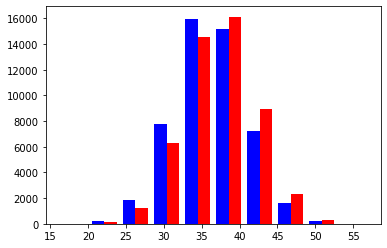

In [44]:
colors = ['blue', 'red']
plt.hist(a[0:2], bins = 10, color = colors)

From this plot it can be seen that Banker has greater frequencies in winning. (after 40). Where as, players usually has the lower frequencies. The first half (less than 40). The game is in favour of Banker.

In [0]:
colors_three = ['blue', 'red', 'orange']

df = pd.DataFrame({
    'Player':[a[3]],
    'Banker':[a[4]],
    'Tie':[a[5]]
})

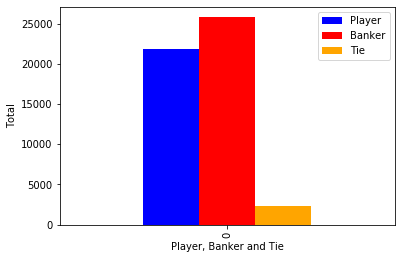

In [46]:
df.plot(kind = 'bar', color = colors_three)
plt.xlabel('Player, Banker and Tie')
plt.ylabel('Total')
plt.show()

In [49]:
expected_player = a[3]/n
expected_banker = a[4]/n
expected_tie = a[5]/n

print(expected_player)
print(expected_banker)
print(expected_tie)

0.4378
0.51626
0.04594


Lets compare the results by looking the total number of hands

In [66]:
total_hands = sum(a[0]) + sum(a[1]) + sum(a[2])
print("total number of hands is " + str(total_hands))

#looking at all hand
total_players_won = sum(a[0])
print("total number of hands player won is " + str(total_players_won))

total_bankers_won = sum(a[1])
print("total number of hands banker won is " + str(total_bankers_won))

total_tie_won = sum(a[2])
print("total number of tie hand won is " + str(total_tie_won))

#expected return

exp_player = total_players_won / total_hands
print("player = " + str(exp_player))

exp_banker = total_bankers_won / total_hands
print("banker = " + str(exp_banker))

exp_tie = total_tie_won / total_hands
print("tie = " + str(exp_tie))


total number of hands is 4023276
total number of hands player won is 1817544
total number of hands banker won is 1858619
total number of tie hand won is 347113
player = 0.4517572247094159
banker = 0.4619665665492499
tie = 0.08627620874133418


In [0]:
df2 = pd.DataFrame({
    'Player' : [sum(a[0])],
    'Banker' : [sum(a[1])],
    'Tie' : [sum(a[2])]
})

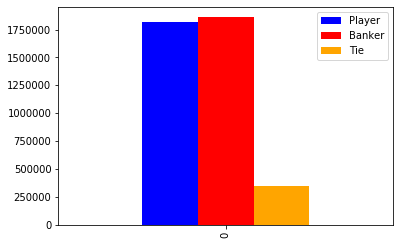

In [70]:
df2.plot(kind = 'bar',color = colors_three)
plt.show()